# Compute gcorr retina and other organs vascular IDP (ldsr)

In [1]:
import sys, os
import pandas as pd
import numpy as np
import logging

os.chdir('..')
current_dir = os.getcwd()

from settings import PYTHON_LOGGING_LEVEL, DIR_UTILS, DIR_OUTPUT, DATE_USED, MULTIPLE_TESTING

logger = logging.getLogger(__name__)
logging.basicConfig(level=PYTHON_LOGGING_LEVEL)
sys.path.append(DIR_UTILS)


In [2]:

from utils.preprocessing_genet.previous_sumstats import (individual_star,
                                                         doble_plot_corr_pval)

In [3]:
heritability_diag = True

In [4]:

# Function to read a CSV, set index, and drop the specified column
def read_and_process_csv(file_path):
    df = pd.read_csv(file_path)
    df.index = df['Unnamed: 0']
    df.drop(columns=['Unnamed: 0'], inplace=True)
    df.index.name = None
    return df

# Function to read a CSV, replace NaN with empty strings, set index, and drop the specified column
def read_and_process_log10p_csv(file_path):
    df = pd.read_csv(file_path)
    df.replace(np.nan, '', inplace=True)
    df.index = df['Unnamed: 0']
    df.drop(columns=['Unnamed: 0'], inplace=True)
    df.index.name = None
    return df

# Read and process the CSV files
df_corr_all = read_and_process_csv(f'{DIR_OUTPUT}{DATE_USED}_complete_corr_gcorr.csv')
df_log10p_all = read_and_process_log10p_csv(f'{DIR_OUTPUT}{DATE_USED}_complete_log10p_gcorr.csv')

df_corr_IDPs = read_and_process_csv(f'{DIR_OUTPUT}{DATE_USED}_first_corr_gcorr.csv')
df_log10p_IDPs = read_and_process_log10p_csv(f'{DIR_OUTPUT}{DATE_USED}_first_log10p_gcorr.csv')

df_corr_retina = read_and_process_csv(f'{DIR_OUTPUT}{DATE_USED}_second_corr_gcorr.csv')
df_log10p_retina = read_and_process_log10p_csv(f'{DIR_OUTPUT}{DATE_USED}_second_log10p_gcorr.csv')



In [5]:
f'{DIR_OUTPUT}{DATE_USED}_second_h2_gcorr.csv'

'/NVME/decrypted/UKbiobank_90947/sov_vascular/2024_02_19_second_h2_gcorr.csv'

In [6]:
if heritability_diag:
    #df_h2_all= read_and_process_csv(f'{DIR_OUTPUT}{DATE_USED}_complete_h2_gcorr.csv')
    df_h2_IDPs = read_and_process_csv(f'{DIR_OUTPUT}{DATE_USED}_second_h2_gcorr.csv')
    #df_h2_retina= read_and_process_csv(f'{DIR_OUTPUT}{DATE_USED}_second_h2_gcorr.csv')

    #Replace the diag of corr idps by h2
    diagonal_h2_IDPs = np.diag(df_h2_IDPs)
    np.fill_diagonal(df_corr_IDPs.values, diagonal_h2_IDPs)
    
    #Replace the diag of log10p idps by ''
    np.fill_diagonal(df_log10p_IDPs.values, '')


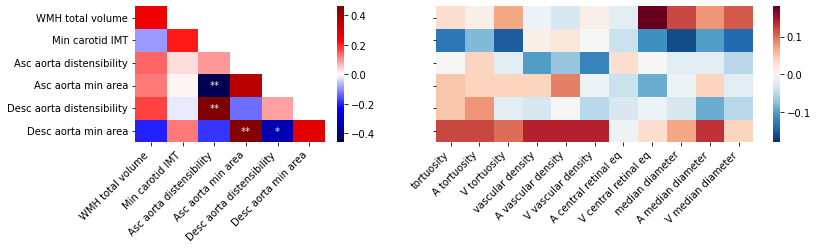

In [7]:
title_doble= f'{DATE_USED}_g_IDPs_IDPs_and_IDPs_retina_multest_{MULTIPLE_TESTING}.jpg'
doble_plot_corr_pval(df_corr1=df_corr_IDPs,
                    df_pval1=df_log10p_IDPs, 
                    df_corr2=df_corr_retina,
                    df_pval2=df_log10p_retina, 
                    figsize_val= (12, 2.5), #(12, 4), #(14, 6)
                    width_ratios_val= [0.6, 1], #[1,1], #[1, 0.7],
                    title_fig=title_doble, 
                    only_half1=True, 
                    only_half2=False, 
                    cmap_used1='seismic', 
                    cmap_used2='RdBu_r')


<Figure size 432x288 with 0 Axes>

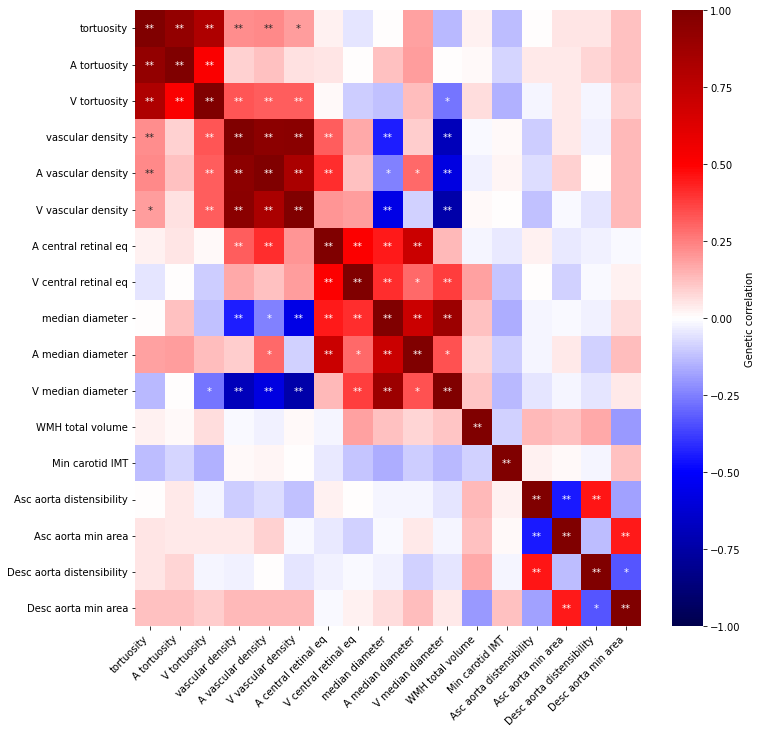

In [8]:
individual_star(df_corr_all, df_log10p_all, 1.5)